In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression

# **Load data from CSV**

In [2]:
data = pd.read_csv("Information for Accommodation.csv")

In [3]:
#head
data.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
0,Boutique Hotels,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",10,NaN,Kandy,Kandy Divisional Secretariat,Kandy,80.635411,7.276036
1,Boutique Hotels,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",10,NaN,Matara,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334
2,Boutique Hotels,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",21,NaN,Anuradhapura,Anuradhapura East,Anuradhapura,80.545063,8.205927
3,Boutique Hotels,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",14,NaN,Galle,Galle Divisional Secretariat,Galle,80.217563,6.026649
4,Boutique Hotels,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",21,NaN,Matale,NaN,Matale,80.710743,7.943525


In [4]:
#tail
data.tail()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
2125,Tourist Hotels,HOTEL NIPPON,"123, KUMARANRATNAM ROAD, COLOMBO 02",49,NaN,Colombo,Colombo,Colombo Divisional Secretariat,79.850099,6.923932
2126,Tourist Hotels,THIDAS ARANA HOTEL,"23RD,MILE POST,BANDIWEWA,POLONNARUWA",11,NaN,Polonnaruwa,Thamankaduwa Pradeshiya Sabha,Thamankaduwa Divisional Secretariat,80.986056,7.951938
2127,Tourist Hotels,THE GRAND MOUNTAIN HOTEL,"73/1,ROHANA DISSANAYAKE MAWATHA,MC ROAD,MATALE.",86,NaN,Matale,Matale,Matale Divisional Secretariat,NaN,NaN
2128,Tourist Hotels,ARIE LAGOON - NEGOMBO,"587,PAMUNUGAMA ROAD,THALAHENA, NEGOMBO",55,NaN,Gampaha,Negombo,Negombo Divisional Secretariat,79.823391,7.168803
2129,Tourist Hotels,THE VILLAS,"352/4,RATHNAYAKA ROAD,THALPITIYA SOUTH,WADDUWA,,",32,NaN,Kalutara,Panadura Pradeshiya Sabha,Panadura Divisional Secretariat,79.923348,6.670724


# **Data Cleaning**

In [5]:
#shape
data.shape

(2130, 10)

In [6]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          2130 non-null   object 
 1   Name          2130 non-null   object 
 2   Address       2130 non-null   object 
 3   Rooms         2130 non-null   int64  
 4   Grade         1837 non-null   object 
 5   District      2130 non-null   object 
 6   AGA Division  2111 non-null   object 
 7   PS/MC/UC      2127 non-null   object 
 8   Logitiute     1368 non-null   float64
 9   Latitude      1370 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 166.5+ KB


In [7]:
missing_values = data.isnull().sum()
print(missing_values)

Type              0
Name              0
Address           0
Rooms             0
Grade           293
District          0
AGA Division     19
PS/MC/UC          3
Logitiute       762
Latitude        760
dtype: int64


In [8]:
missing_values = data.isnull().sum()/data.shape[0]*100
print(missing_values)

Type             0.000000
Name             0.000000
Address          0.000000
Rooms            0.000000
Grade           13.755869
District         0.000000
AGA Division     0.892019
PS/MC/UC         0.140845
Logitiute       35.774648
Latitude        35.680751
dtype: float64


# **Finding Duplicates**

In [9]:
duplicate_values = data.duplicated().sum()
print(duplicate_values)

0


# **Identifying Garbage values**

In [10]:
for i in data.select_dtypes(include="object").columns:
    print(data[i].value_counts())
    print("***"*10)

Guest Houses                    894
Home Stay Units                 378
Bangalows                       348
Tourist Hotels                  229
Classified Hotels( 1-5 Star)    141
Rented Apartments                64
Boutique Villas                  36
Boutique Hotels                  28
Rented Homes                      6
Heritage Bungalows                4
Heritage Homes                    2
Name: Type, dtype: int64
******************************
HOTEL SUNHILL                     2
THISARA HOLIDAY BUNGALOW          2
VISAL BUNGALOWS                   2
MANGO VILLA                       2
SERENE VILLA                      2
                                 ..
HABARANA REST HOUSE               1
HANWELLA REST HOUSE               1
DAMBULLA REST HOUSE               1
SANDAKELUM TOURIST GUEST HOUSE    1
THE VILLAS                        1
Name: Name, Length: 2120, dtype: int64
******************************
ARUGAMBAY,POTTUVIL.                                   6
ETHULGASHINNA,KITHAL-ELLA,

# **Inconsistencies**

In [11]:
 #Fix typos (assuming typos in 'Logitiute' should be 'Longitude')
data.rename(columns={"Logitiute": "Longitude"}, inplace=True)

In [12]:
data.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Longitude,Latitude
0,Boutique Hotels,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",10,NaN,Kandy,Kandy Divisional Secretariat,Kandy,80.635411,7.276036
1,Boutique Hotels,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",10,NaN,Matara,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334
2,Boutique Hotels,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",21,NaN,Anuradhapura,Anuradhapura East,Anuradhapura,80.545063,8.205927
3,Boutique Hotels,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",14,NaN,Galle,Galle Divisional Secretariat,Galle,80.217563,6.026649
4,Boutique Hotels,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",21,NaN,Matale,NaN,Matale,80.710743,7.943525


# **Data Types**

In [13]:
data["Rooms"] = pd.to_numeric(data["Rooms"], errors="coerce")  # coerce: convert errors to NaN
data[["Longitude", "Latitude"]] = data[["Longitude", "Latitude"]].apply(pd.to_numeric)

In [14]:
data.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Longitude,Latitude
0,Boutique Hotels,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",10,NaN,Kandy,Kandy Divisional Secretariat,Kandy,80.635411,7.276036
1,Boutique Hotels,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",10,NaN,Matara,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334
2,Boutique Hotels,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",21,NaN,Anuradhapura,Anuradhapura East,Anuradhapura,80.545063,8.205927
3,Boutique Hotels,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",14,NaN,Galle,Galle Divisional Secretariat,Galle,80.217563,6.026649
4,Boutique Hotels,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",21,NaN,Matale,NaN,Matale,80.710743,7.943525


# **Data Preprocessing**

In [15]:
# Encoding categorical variables (One-Hot Encoding)
categorical_columns = ['Type', 'District']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

In [16]:
# Feature scaling (numerical features)
numerical_columns = ['Rooms']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

In [17]:
data_encoded.head()

,Name,Address,Rooms,Grade,AGA Division,PS/MC/UC,Longitude,Latitude,Type_Bangalows,Type_Boutique Hotels,...,District_Matale,District_Matara,District_Moneragala,District_Mullaitivu,District_Nuwara Eliya,District_Polonnaruwa,District_Puttalam,District_Ratnapura,District_Trincomalee,District_Vavuniya
0,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",-0.189963,NaN,Kandy Divisional Secretariat,Kandy,80.635411,7.276036,0,1,...,0,0,0,0,0,0,0,0,0,0
1,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",-0.189963,NaN,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334,0,1,...,0,1,0,0,0,0,0,0,0,0
2,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",0.110181,NaN,Anuradhapura East,Anuradhapura,80.545063,8.205927,0,1,...,0,0,0,0,0,0,0,0,0,0
3,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",-0.080820,NaN,Galle Divisional Secretariat,Galle,80.217563,6.026649,0,1,...,0,0,0,0,0,0,0,0,0,0
4,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",0.110181,NaN,NaN,Matale,80.710743,7.943525,0,1,...,1,0,0,0,0,0,0,0,0,0


# **Exploratory Data Analysis(EDA)**

## **Descriptive Analysis**

In [18]:
#Descriptive statistics
data.describe()

,Rooms,Longitude,Latitude
count,2130.000000,1368.000000,1370.000000
mean,16.961972,80.430743,7.058470
std,36.657709,0.509183,2.119415
min,1.000000,79.705919,5.936771
25%,4.000000,79.967549,6.452453
50%,6.000000,80.396191,6.915005
75%,14.000000,80.729967,7.287510
max,541.000000,81.856883,80.791643


In [19]:
data.describe(include="object")

,Type,Name,Address,Grade,District,AGA Division,PS/MC/UC
count,2130,2130,2130,1837,2130,2111,2127
unique,11,2120,2095,11,25,183,232
top,Guest Houses,HOTEL SUNHILL,"ARUGAMBAY,POTTUVIL.",A,Colombo,Kandy,Kandy Divisional Secretariat
freq,894,2,6,461,297,186,122


In [20]:
print("\nFrequency Counts:")
for column in data.select_dtypes(include="object"):
    print(data[column].value_counts())


Frequency Counts:
Guest Houses                    894
Home Stay Units                 378
Bangalows                       348
Tourist Hotels                  229
Classified Hotels( 1-5 Star)    141
Rented Apartments                64
Boutique Villas                  36
Boutique Hotels                  28
Rented Homes                      6
Heritage Bungalows                4
Heritage Homes                    2
Name: Type, dtype: int64
HOTEL SUNHILL                     2
THISARA HOLIDAY BUNGALOW          2
VISAL BUNGALOWS                   2
MANGO VILLA                       2
SERENE VILLA                      2
                                 ..
HABARANA REST HOUSE               1
HANWELLA REST HOUSE               1
DAMBULLA REST HOUSE               1
SANDAKELUM TOURIST GUEST HOUSE    1
THE VILLAS                        1
Name: Name, Length: 2120, dtype: int64
ARUGAMBAY,POTTUVIL.                                   6
ETHULGASHINNA,KITHAL-ELLA,ELLA                        4
ARUGAMBAY,POT

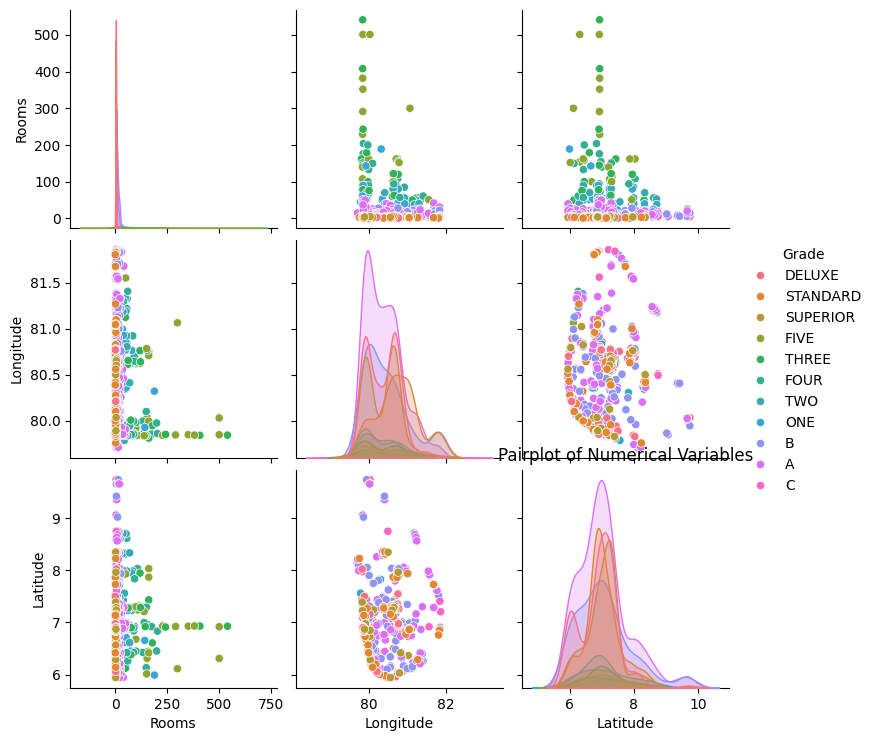

In [118]:
# Pairplot for visualizing relationships between numerical variables
sns.pairplot(data[['Rooms', 'Longitude', 'Latitude', 'Grade']], hue='Grade')
plt.title("Pairplot of Numerical Variables")
plt.show()

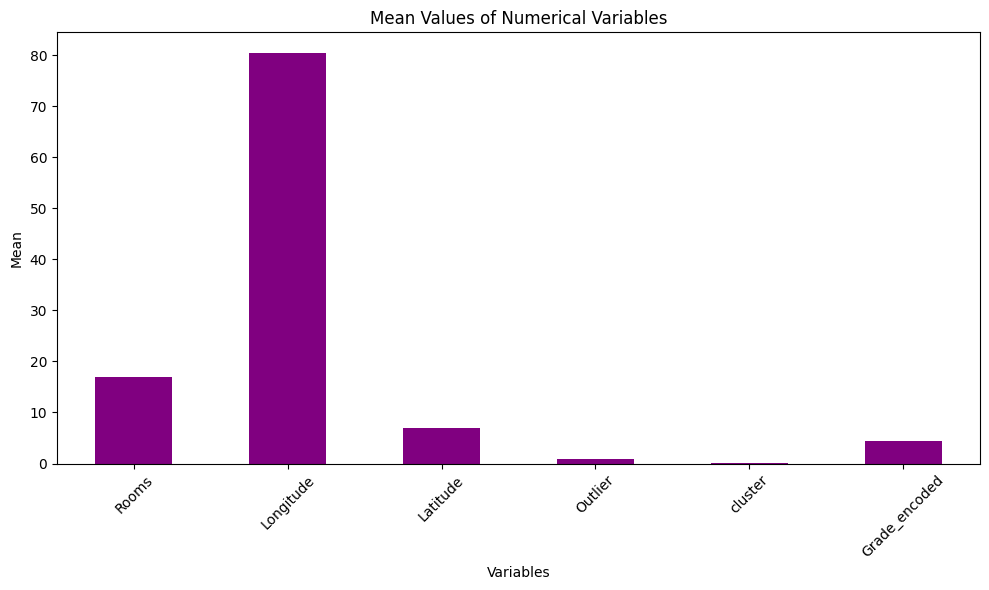

In [119]:
#Bar plot for summary statistics
plt.figure(figsize=(10, 6))
data.describe().loc['mean'].plot(kind='bar', color='purple')
plt.title('Mean Values of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-120-17faf65230f0>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')
<ipython-input-120-17faf65230f0>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')
<ipython-input-120-17faf65230f0>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')


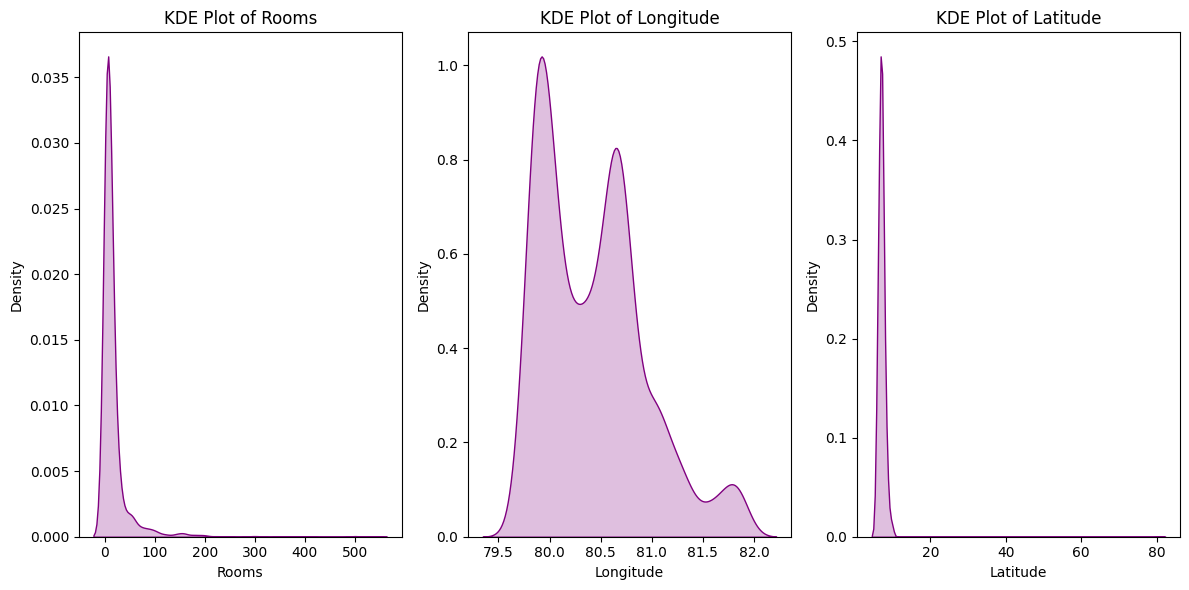

In [120]:
# KDE plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Rooms', 'Longitude', 'Latitude']):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(data[col], shade=True, color='purple')
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.manifold import TSNE

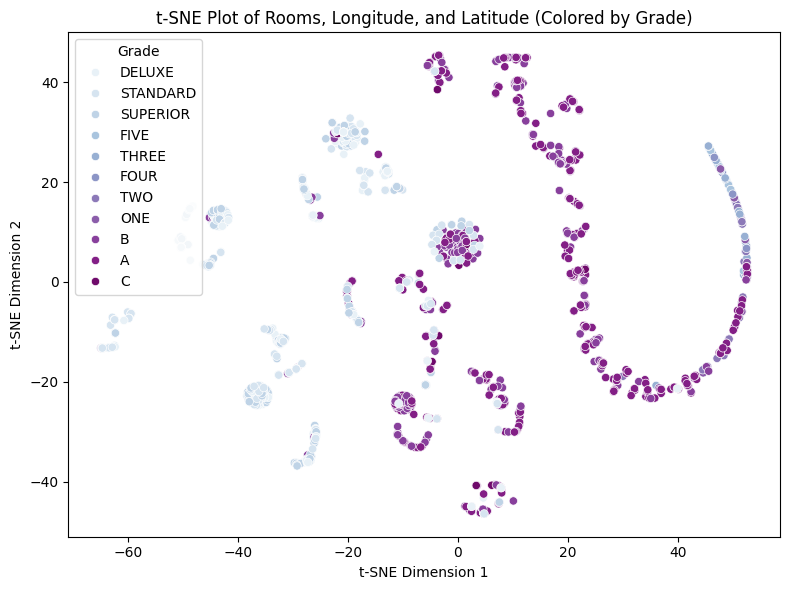

In [60]:
from sklearn.impute import SimpleImputer

# Handle missing values by imputing using mean strategy
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(data[['Rooms', 'Longitude', 'Latitude']]), columns=['Rooms', 'Logitiute', 'Latitude'])

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_imputed)

# Diagnostic Analysis
# t-SNE plot colored by target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=data['Grade'], palette='BuPu')
plt.title('t-SNE Plot of Rooms, Longitude, and Latitude (Colored by Grade)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Grade')
plt.tight_layout()
plt.show()


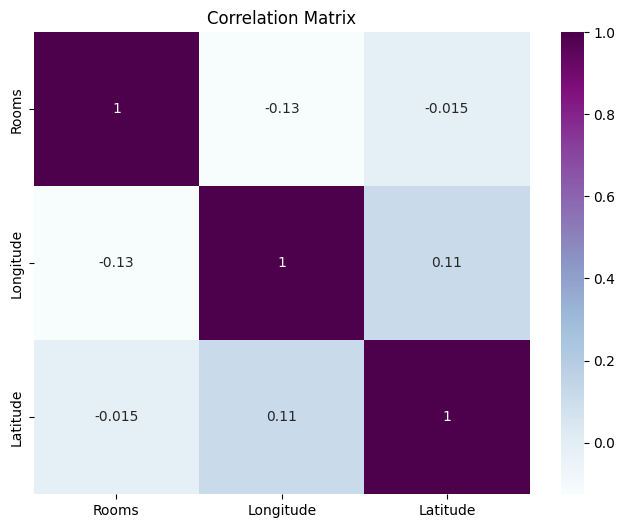

In [121]:
# Correlation Analysis
numeric_data = data[['Rooms', 'Longitude', 'Latitude']]

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()


## **Diagnostic analysis**

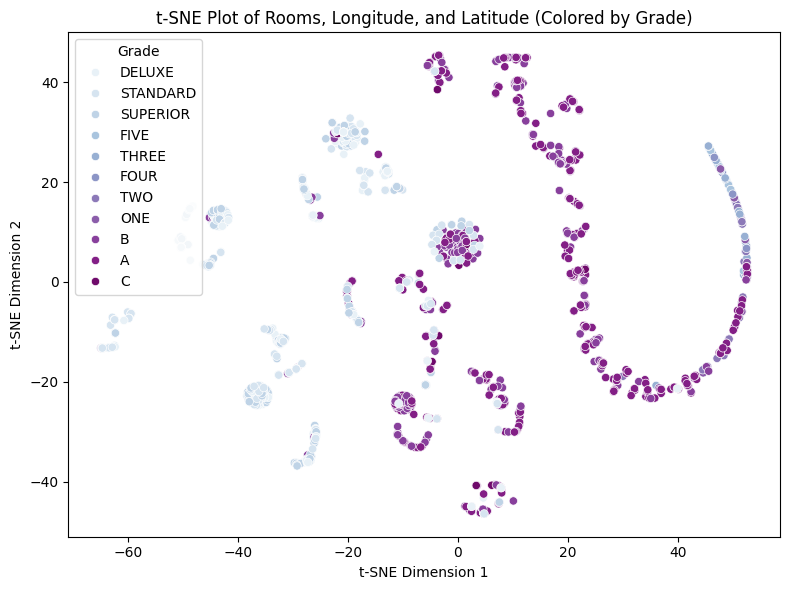

In [122]:
# Handle missing values by imputing using mean strategy
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(data[['Rooms', 'Longitude', 'Latitude']]), columns=['Rooms', 'Logitiute', 'Latitude'])

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_imputed)

# Diagnostic Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=data['Grade'], palette='BuPu')
plt.title('t-SNE Plot of Rooms, Longitude, and Latitude (Colored by Grade)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Grade')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


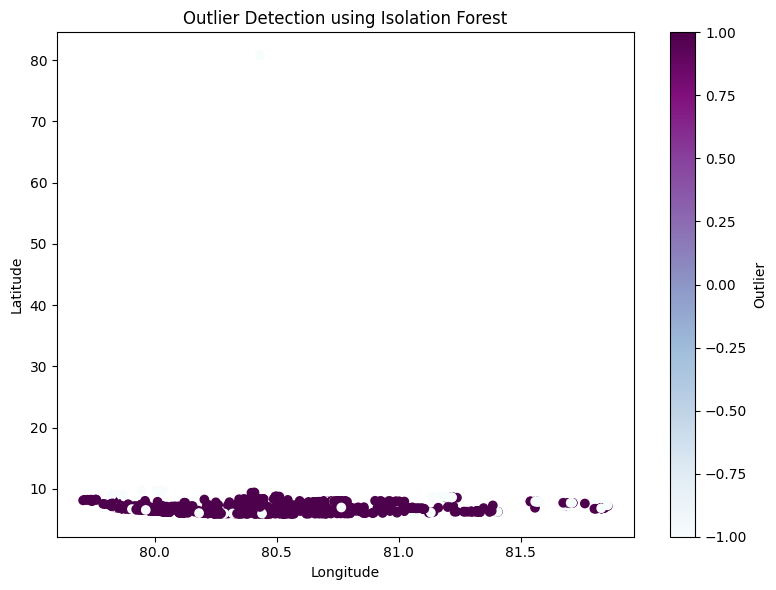

In [123]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(data[['Rooms', 'Longitude', 'Latitude']]), columns=['Rooms', 'Longitude', 'Latitude'])

# Outlier detection using Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)
outliers = clf.fit_predict(df_imputed)
data['Outlier'] = outliers

# Diagnostic Analysis
plt.figure(figsize=(8, 6))
plt.scatter(df_imputed['Longitude'], df_imputed['Latitude'], c=data['Outlier'], cmap='BuPu')
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Outlier')
plt.tight_layout()
plt.show()

## **Predictive analysis**

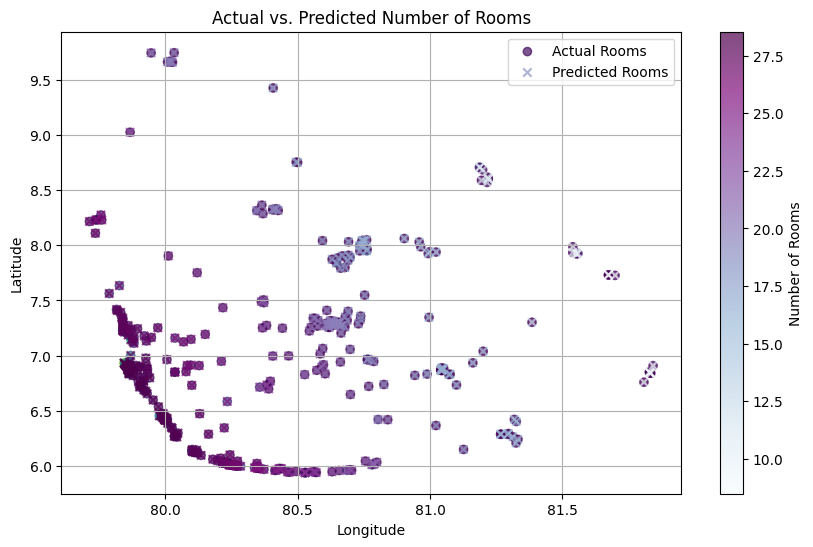

In [124]:
# Drop missing values
data_numeric = data.drop(['Type', 'Name', 'Address', 'Grade', 'District', 'AGA Division', 'PS/MC/UC'], axis=1).dropna()

# Split data into features (X) and target variable (y)
X = data_numeric[['Longitude', 'Latitude']]
y = data_numeric['Rooms']

# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Visualize actual vs. predicted number of rooms
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=y_test, cmap='viridis', label='Actual Rooms', alpha=0.7)
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=y_pred, cmap='BuPu', label='Predicted Rooms', alpha=0.7, marker='x')
plt.colorbar(label='Number of Rooms')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Actual vs. Predicted Number of Rooms')
plt.legend()
plt.grid(True)
plt.show()

## **Prescriptive analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)


<Figure size 1200x800 with 0 Axes>

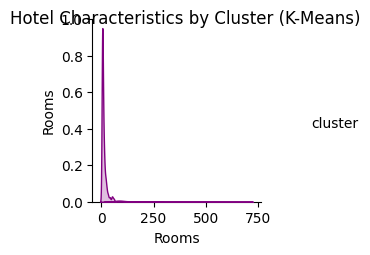

<ipython-input-125-a431d63dbefe>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y="Rooms", data=data, palette=custom_palette)


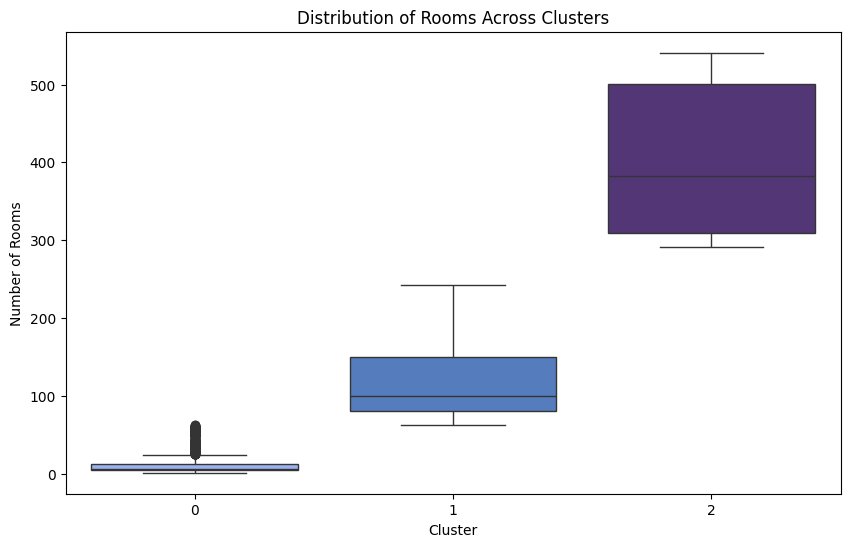

In [125]:
features = ["District", "Grade", "Rooms"]

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first category to avoid multicollinearity
encoded_features = encoder.fit_transform(data[["District", "Grade"]])

# Combine encoded features with the numerical feature "Rooms"
X = np.concatenate([encoded_features, data["Rooms"].values.reshape(-1, 1)], axis=1)

# Perform k-Means clustering with a chosen number of clusters
kmeans = KMeans(n_clusters=3)  # 3 clusters for example
kmeans.fit(X)
data["cluster"] = kmeans.labels_

# Scatter plot
plt.figure(figsize=(12, 8))
custom_palette = ["purple"]
sns.pairplot(data[features + ["cluster"]], hue="cluster", palette=custom_palette)
plt.suptitle("Hotel Characteristics by Cluster (K-Means)")
plt.show()

# Boxplots for Rooms across clusters
plt.figure(figsize=(10, 6))
custom_palette = ["#8CABFF", "#4477CE", "#512B81"]
sns.boxplot(x="cluster", y="Rooms", data=data, palette=custom_palette)
plt.xlabel("Cluster")
plt.ylabel("Number of Rooms")
plt.title("Distribution of Rooms Across Clusters")
plt.show()

<ipython-input-126-3a43fc1a7e65>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='District', order=data['District'].value_counts().index, palette='viridis')


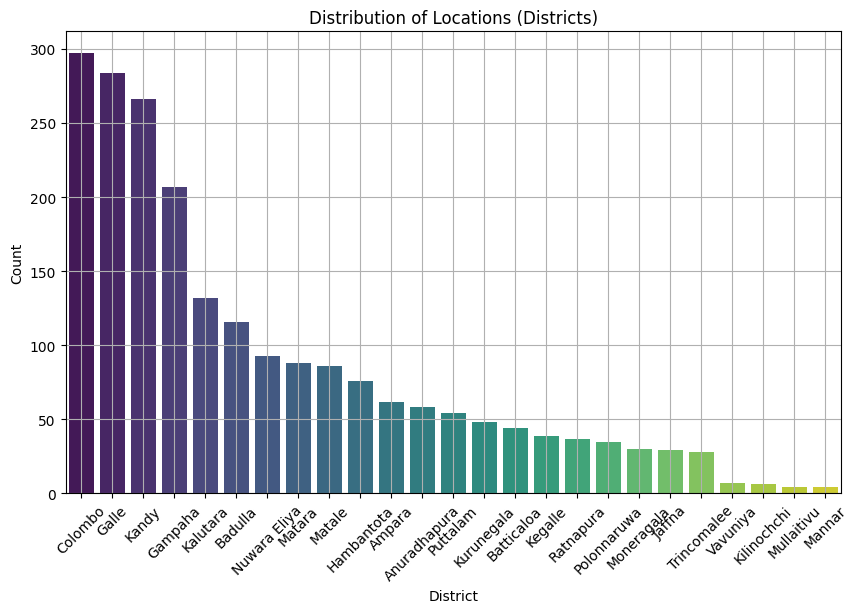

In [126]:
# Distribution of locations (Districts)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='District', order=data['District'].value_counts().index, palette='viridis')
plt.title('Distribution of Locations (Districts)')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

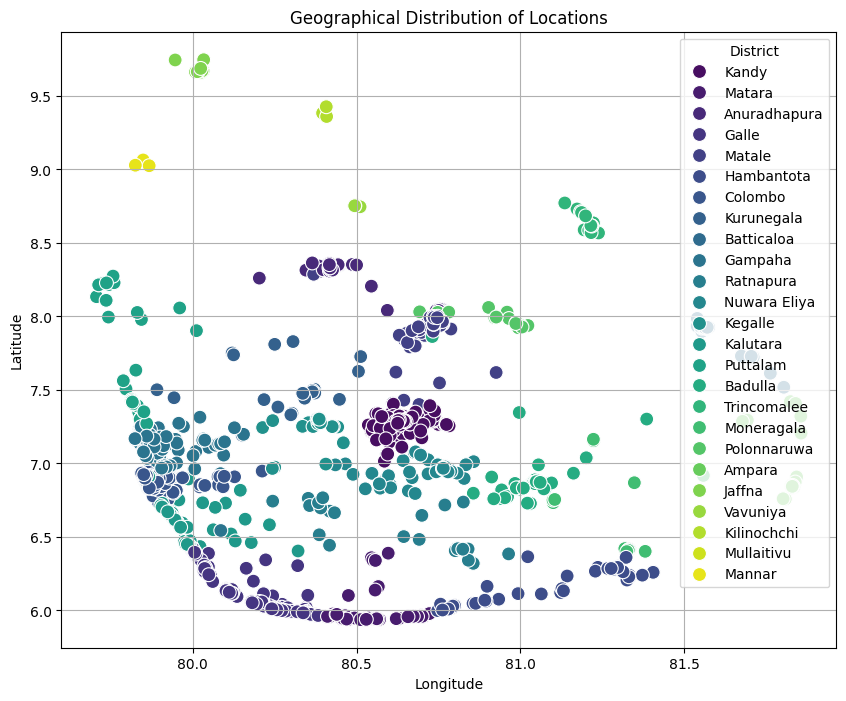

In [127]:
# Geographical distribution of locations
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Longitude', y='Latitude', hue='District', palette='viridis', s=100)
plt.title('Geographical Distribution of Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='District')
plt.grid(True)
plt.show()

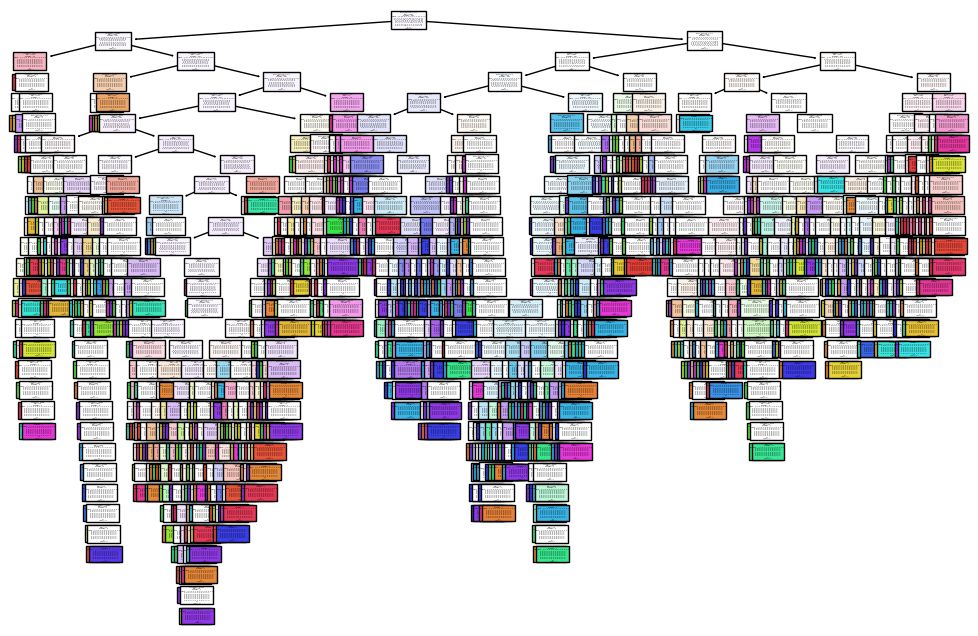

In [128]:
#Drop columns
data_numeric = data.drop(['Type', 'Name', 'Address', 'Grade', 'District', 'AGA Division', 'PS/MC/UC'], axis=1).dropna()

# Split data into features and target variable
X = data_numeric.drop('Rooms', axis=1)  # Features
y = data_numeric['Rooms']  # Target variable

# Convert y to string
y = y.astype(str)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

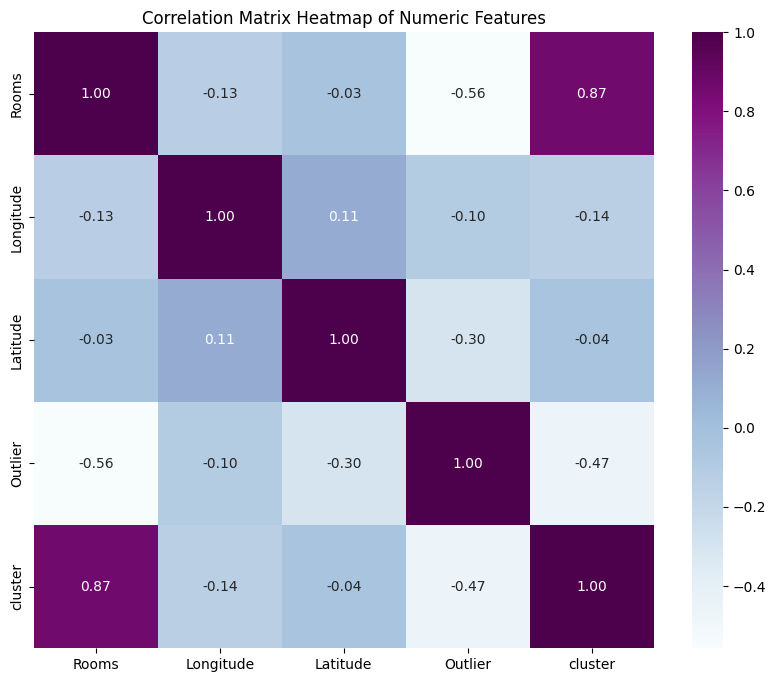

In [106]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Numeric Features')
plt.show()